## Define RUL Thresholds for Alert Levels
- This notebook focuses on defining and documenting the Remaining Useful Life (RUL) threshold values that will form the basis for risk alerting.

- Load sample RUL prediction data or synthetic RUL range to explore value distribution.

- Define thresholds for maintenance alert levels:

   -  Normal: RUL above warning threshold (safe zone)

   - Warning: RUL between warning and critical thresholds (maintenance soon)

   - Critical: RUL below critical threshold (immediate maintenance)

- Rationale: thresholds should balance early failure detection with avoiding excessive false alarms.

- Document threshold values and justification for later integration into alerting logic.

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [9]:
# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Function to categorize RUL risk levels
def categorize_rul(rul, warning_thresh, critical_thresh):
    if rul <= critical_thresh:
        return 'Critical'
    elif rul <= warning_thresh:
        return 'Warning'
    else:
        return 'Normal'

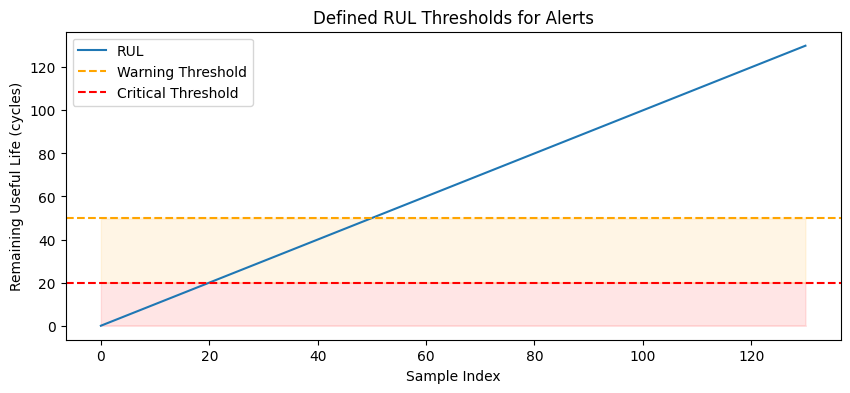

In [12]:
# Apply categorization across RUL values
rul_categories = [categorize_rul(rul, warning_threshold, critical_threshold) for rul in rul_values]

# Quick visualization of threshold zones
plt.figure(figsize=(10, 4))
plt.plot(rul_values, rul_values, label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, 0, critical_threshold, color='red', alpha=0.1)
plt.fill_between(rul_values, critical_threshold, warning_threshold, color='orange', alpha=0.1)
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()

In [13]:
# Document threshold values and rationale
print(f"Warning Threshold: {warning_threshold} cycles - signals maintenance soon")
print(f"Critical Threshold: {critical_threshold} cycles - signals immediate maintenance required")

Warning Threshold: 50 cycles - signals maintenance soon
Critical Threshold: 20 cycles - signals immediate maintenance required


- Task: Implement this on 'sequence_metadata_with_RUL' csv file and plot the threshold zones.

In [20]:
rul_values = pd.read_csv('/content/drive/MyDrive/Infosys_Internship/Data Preparation/sequence_metadata_with_RUL.csv')
rul_values = rul_values['RUL']
rul_values.sample(5)

,RUL
8693,81.0
14617,14.0
7230,86.0
16484,130.0
13517,65.0


In [21]:
rul_categories = [categorize_rul(rul, warning_threshold, critical_threshold) for rul in rul_values]
len(rul_categories)

17631

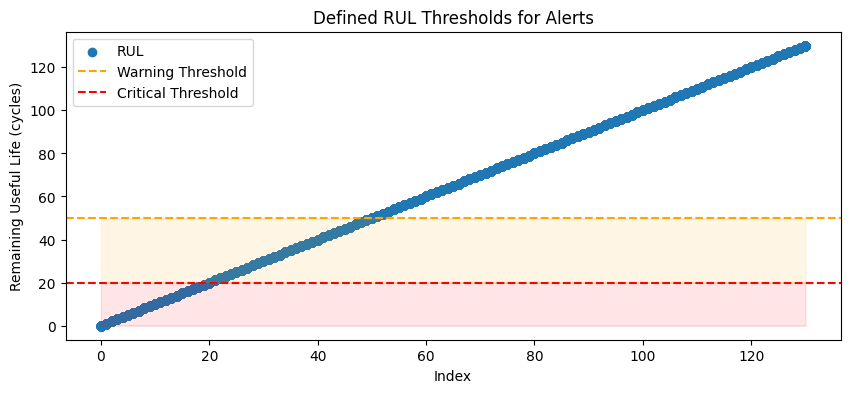

In [22]:
# Quick visualization of threshold zones
plt.figure(figsize=(10, 4))
plt.scatter(rul_values, rul_values,label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, 0, critical_threshold, color='red', alpha=0.1)
plt.fill_between(rul_values, critical_threshold, warning_threshold, color='orange', alpha=0.1)
plt.xlabel('Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()